# Part 2: Disciplinary Policy National Analysis

## All necessary imports

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Read in data

In [72]:
data_path = 'data/'
df = pd.read_csv(data_path + 'historic_policy_data.csv', index_col="Year")
df

,% Suspension,% Year Removal,% Transfer,% security staff,% law enforcement with firearm,% metal detectors,% security cameras,% locked doors,% locker checks,% schools violent incident,Violent crime per 1000,Minority 0-25% security staff,Minority 25-50% security staff,Minority 50-75% security staff,Minority 75-100% security staff,Minority 0-25% law enforcement with firearm,Minority 25-50% law enforcement with firearm,Minority 50-75% law enforcement with firearm,Minority 75-100% law enforcement with firearm
Year,,,,,,,,,,,,,,,,,,,
2005-2006,74.23305,5.40313,20.36382,41.65904,30.74304,10.67170,57.91350,54.25330,53.18560,77.73677,31.15970,34.91826,42.42003,47.47194,53.88218,27.63036,36.73133,34.31932,28.51786
2007-2008,75.96367,5.38348,18.65286,46.31144,34.14968,10.12440,66.03740,60.87640,53.55010,75.45520,27.87971,40.65335,44.89788,44.81241,62.31480,34.29399,38.23215,31.71239,31.61629
2009-2010,73.86231,6.13692,20.00077,42.75729,28.03615,10.57510,70.03140,64.30880,53.75690,73.83720,25.00298,35.04606,42.76169,49.48978,54.51001,25.85304,32.12523,33.40053,26.06472
2015-2016,71.74824,4.31997,23.93179,56.51682,42.92637,12.34831,82.51670,78.18020,52.88099,68.93775,17.53865,51.14082,51.56285,62.90582,64.51964,45.55993,43.32143,47.28651,35.84235
2017-2018,72.57346,5.12254,22.30400,61.44897,46.66295,10.36333,83.76312,78.80968,47.81693,70.68440,19.57669,58.33032,59.24733,61.51576,67.42589,52.49729,47.35510,48.12068,37.39100
2019-2020,68.41928,4.86017,26.72055,65.00293,51.39813,11.87798,86.00919,84.58194,46.70004,70.19048,19.20800,64.44340,62.32250,65.35529,67.63201,57.14742,54.63931,49.56159,42.82308


In [74]:
predictors = ["% Suspension", "% Year Removal", "% Transfer", "% security staff", "% law enforcement with firearm", \
        "% metal detectors", "% security cameras", "% locked doors", "% locker checks"]
responses = ["% schools violent incident", "Violent crime per 1000"]

pipeline = imbpipeline(steps = [ 
    ['smote', SMOTE(random_state=0)],
    ['classifier', XGBClassifier(random_state=0, reg_lambda=0)]
    ])

linreg_model = LinearRegression()
for response in responses:
    X_train, X_test, y_train, y_test = train_test_split(df[predictors], df.loc[:, response], random_state=0)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model_fit = linreg_model.fit(X_train, y_train)
    X_test = sm.add_constant(X_test)
    results = sm.OLS(y_test, X_test).fit()
    print("\nMultiple Regression Model\n", " Response:", response + "\n", results.summary())
    multiple_regression_score = mean_squared_error(y_train, model_fit.predict(X_train))
    print("\nMultiple Regression Score:", multiple_regression_score)


Multiple Regression Model
  Response: % schools violent incident
                                 OLS Regression Results                                
Dep. Variable:     % schools violent incident   R-squared:                       1.000
Model:                                    OLS   Adj. R-squared:                    nan
Method:                         Least Squares   F-statistic:                       nan
Date:                        Wed, 03 May 2023   Prob (F-statistic):                nan
Time:                                01:08:40   Log-Likelihood:                 163.37
No. Observations:                           6   AIC:                            -314.7
Df Residuals:                               0   BIC:                            -316.0
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t

C:\Python39\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Python39\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not

In [76]:
predictors = ["% Suspension", "% Year Removal", "% Transfer", "% security staff", "% law enforcement with firearm", \
        "% metal detectors", "% security cameras", "% locked doors", "% locker checks"]
responses = ["% schools violent incident", "Violent crime per 1000"]

linreg_model = LinearRegression()
for response in responses:
    X_train = df[predictors]
    print(X_train)
    y_train = df.loc[:, response]
    print(y_train)
    X_train = sm.add_constant(X_train)
    results = sm.OLS(y_train, X_train).fit()
    print("\nMultiple Regression Model\n", " Response:", response + "\n", results.summary())

           % Suspension  % Year Removal  % Transfer  % security staff  \
Year                                                                    
2005-2006      74.23305         5.40313    20.36382          41.65904   
2007-2008      75.96367         5.38348    18.65286          46.31144   
2009-2010      73.86231         6.13692    20.00077          42.75729   
2015-2016      71.74824         4.31997    23.93179          56.51682   
2017-2018      72.57346         5.12254    22.30400          61.44897   
2019-2020      68.41928         4.86017    26.72055          65.00293   

           % law enforcement with firearm  % metal detectors  \
Year                                                           
2005-2006                        30.74304           10.67170   
2007-2008                        34.14968           10.12440   
2009-2010                        28.03615           10.57510   
2015-2016                        42.92637           12.34831   
2017-2018                      

C:\Python39\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Python39\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not

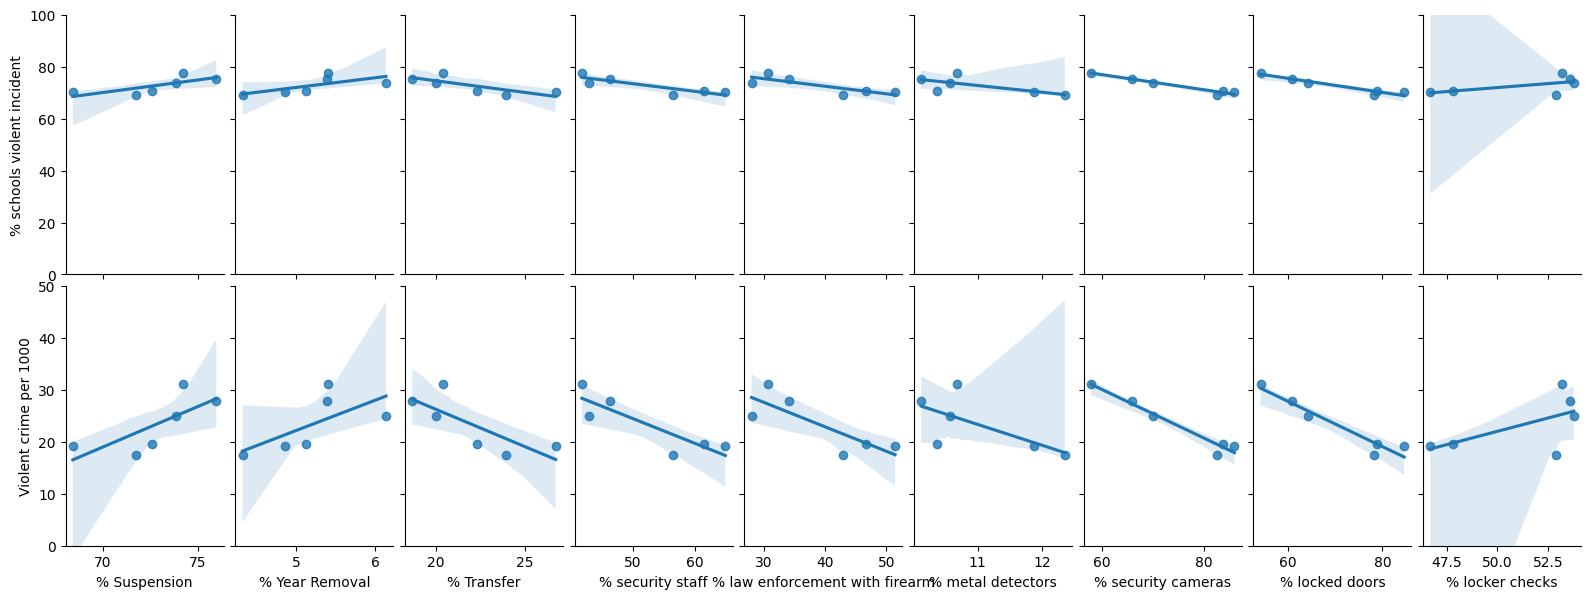

In [60]:
g = sns.pairplot(df, x_vars=predictors, y_vars=responses, kind='reg', height=3, aspect=0.6)
axis_bounds = {"% schools violent incident" : [0, 100], "Violent crime per 1000" : [0, 50]}

for ax in g.axes.flatten():
    ylab = ax.get_ylabel()
    if len(ylab) == 0: 
        continue
    ax.set_ylim(axis_bounds[ylab])

In [ ]:
sns.catplot(
    data=df, x='target', y='value',
    col='variable', kind='box', col_wrap=2
)

<AxesSubplot: xlabel='% Suspension', ylabel='% schools violent incident'>

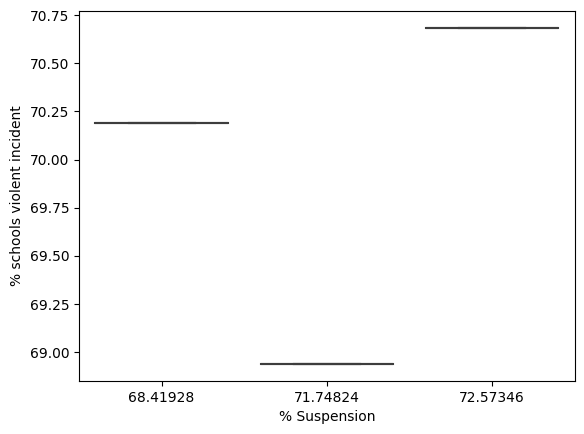

In [53]:
sns.boxplot(data=df, x="% Suspension", y="% schools violent incident")

<AxesSubplot: xlabel='% Year Removal', ylabel='% schools violent incident'>

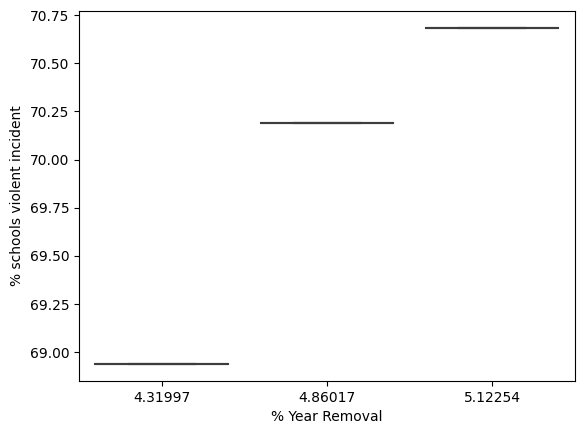

In [54]:
sns.boxplot(data=df, x="% Year Removal", y="% schools violent incident")

In [37]:
linreg_model = LinearRegression()

response_data = df[responses]
preds_data = df[predictors]
X_train, X_test, y_train, y_test = train_test_split(preds_data, response_data, random_state=0)
model_fit = linreg_model.fit(X_train, y_train)
X_test = sm.add_constant(X_test)
results = sm.OLS(y_test, X_test).fit()
print("\nMultiple Regression Model\n", results.summary())

multiple_regression_score = mean_squared_error(y_train, model_fit.predict(X_train))
print(multiple_regression_score)

C:\Python39\lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
C:\Python39\lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
C:\Python39\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 1 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)